<a href="https://colab.research.google.com/github/vamsipavuluri9/Masters-Thesis-VANET-Security/blob/main/%22Multi_Classification_with_KD_Tree_and_Linear_Classifiers_on_Gaussian_Distributions%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  **Task-1 kD-Tree**

---



## kD-Tree implementation logic to find the 1-nearest neighbor for a 2D dataset (i.e., k=2 here)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class KDTree:
    def __init__(self, matrix, depth=0):
        if len(matrix) == 0:
            self.node = None
            self.left = None
            self.right = None
            return

        # Alternating between x and y axes for splitting
        k = matrix.shape[1]
        axis = depth % k

        # Sorting by the selected axis and then splitting the data
        sorted_matrix = matrix[matrix[:, axis].argsort()]
        median_idx = len(sorted_matrix) // 2

        # The median becomes the root node
        self.node = sorted_matrix[median_idx]

        # Recursively building left and right subtrees
        self.left = KDTree(sorted_matrix[:median_idx], depth + 1)
        self.right = KDTree(sorted_matrix[median_idx + 1:], depth + 1)

    def find_nearest(self, point, depth=0, best=None):
        if self.node is None:
            return best

        # Update best if current node is closer
        if best is None or np.linalg.norm(point - self.node) < np.linalg.norm(point - best):
            best = self.node

        # Determine axis for comparison
        k = len(point)
        axis = depth % k

        # Decide which branch to search next
        if point[axis] < self.node[axis]:
            next_branch = self.left
            opposite_branch = self.right
        else:
            next_branch = self.right
            opposite_branch = self.left

        # Explore the next branch
        best = next_branch.find_nearest(point, depth + 1, best) if next_branch else best

        # Check the opposite branch if necessary
        if opposite_branch and abs(point[axis] - self.node[axis]) < np.linalg.norm(point - best):
            best = opposite_branch.find_nearest(point, depth + 1, best)

        return best



    # The following function , I am using in visualizing the generated kD-tree!
    def add_edges_to_graph(self, graph, parent=None, pos=None, depth=0):
        if self.node is None:
            return

        # Adding the current node to the graph
        node_name = f"{self.node}"
        graph.add_node(node_name)

        if parent:
            # Adding an edge between this node and its parent
            graph.add_edge(parent, node_name)

        # Recursively adding left and right children
        if self.left:
            self.left.add_edges_to_graph(graph, node_name, pos, depth + 1)
        if self.right:
            self.right.add_edges_to_graph(graph, node_name, pos, depth + 1)





## Code to graphically visualize the genetated kD-Tree (for any dataset)

In [65]:
# Helper function for creating a hierarchical layout
def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    """
    If there is a cycle that is reachable from root, then this will see infinite recursion.
    G: the graph (must be a tree)
    root: the root node of the current subtree
    width: horizontal space allocated for this branch
    vert_gap: gap between levels of the tree
    vert_loc: vertical location of root
    xcenter: horizontal location of root
    """
    pos = {root: (xcenter, vert_loc)}
    neighbors = list(G.neighbors(root))
    if len(neighbors) != 0:
        dx = width / len(neighbors)
        nextx = xcenter - width / 2 - dx / 2
        for neighbor in neighbors:
            nextx += dx
            pos.update(hierarchy_pos(G, neighbor, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc - vert_gap, xcenter=nextx))
    return pos




# Function to visualize the kD-tree using a hierarchical layout
def visualize_kdtree(tree):
    graph = nx.DiGraph()  # Directed graph to represent the tree

    # Adding nodes and edges to the graph from the tree
    tree.add_edges_to_graph(graph)

    # Getting the root node (the first node added to the tree)
    root_node = list(graph.nodes)[0]

    # Generating the hierarchical layout
    pos = hierarchy_pos(graph, root=root_node)

    # Drawing the tree
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrows=False)
    plt.title("kD-Tree Structure")
    plt.show()


## Testing implemented tree for a random dataset of ten 2D points


Input data points:
[[0.96702984 0.54723225]
 [0.97268436 0.71481599]
 [0.69772882 0.2160895 ]
 [0.97627445 0.00623026]
 [0.25298236 0.43479153]
 [0.77938292 0.19768507]
 [0.86299324 0.98340068]
 [0.16384224 0.59733394]
 [0.0089861  0.38657128]
 [0.04416006 0.95665297]]
The nearest neighbor to [0.5 0.5] is [0.25298236 0.43479153]


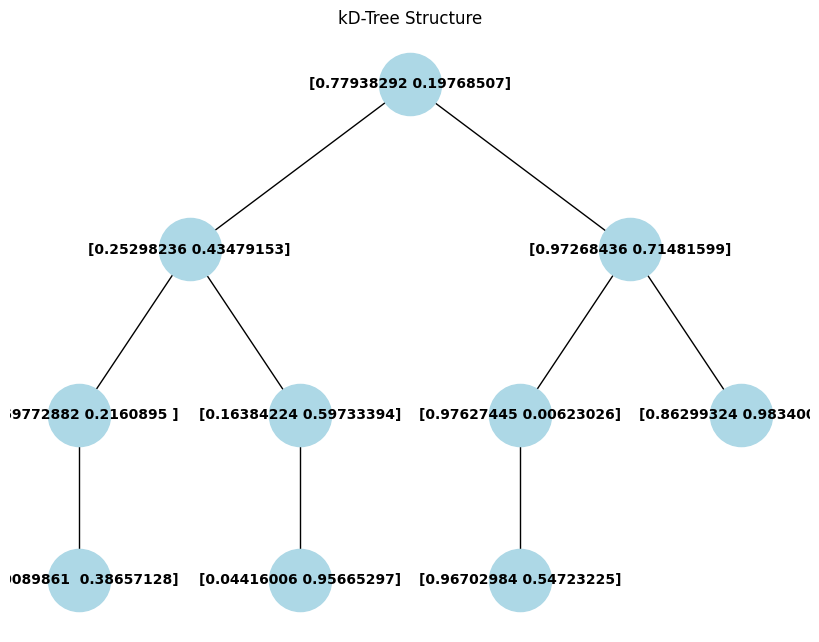

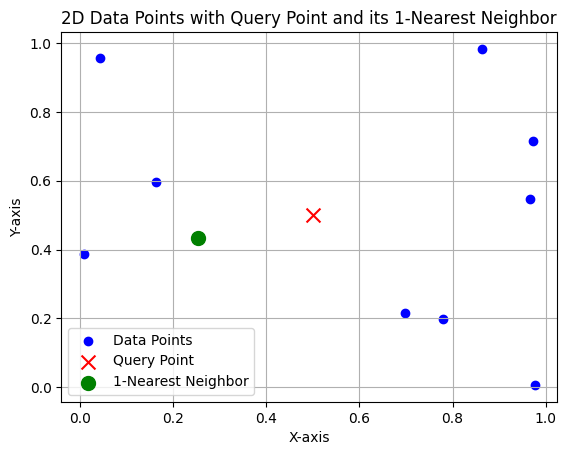

In [67]:
# Example usage
np.random.seed(4)
data = np.random.rand(10, 2)  # Random 2D points
tree = KDTree(data)

query_point = np.array([0.5, 0.5])
nearest_neighbor = tree.find_nearest(query_point)

# Printing the input data points and the 1-nearest neighbor of the given query point
print("Input data points:")
print(data)
print(f"The nearest neighbor to {query_point} is {nearest_neighbor}")

# Visualizing the tree structure
visualize_kdtree(tree)

# Plotting the points for better visualization
plt.scatter(data[:, 0], data[:, 1], label="Data Points", color='blue')
plt.scatter(query_point[0], query_point[1], label="Query Point", color='red', marker='x', s=100)
plt.scatter(nearest_neighbor[0], nearest_neighbor[1], label="1-Nearest Neighbor", color='green', marker='o', s=100)

# Highlight the query point and its 1-nearest neighbor
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Data Points with Query Point and its 1-Nearest Neighbor")
plt.grid(True)
plt.show()



## Testing implemented tree for my own dataset of ten 2D points

Input data points:
[[0 0]
 [1 3]
 [1 5]
 [2 1]
 [2 4]
 [3 3]
 [4 1]
 [4 3]
 [4 4]
 [5 2]]
The nearest neighbor to [3 2] is [3 3]


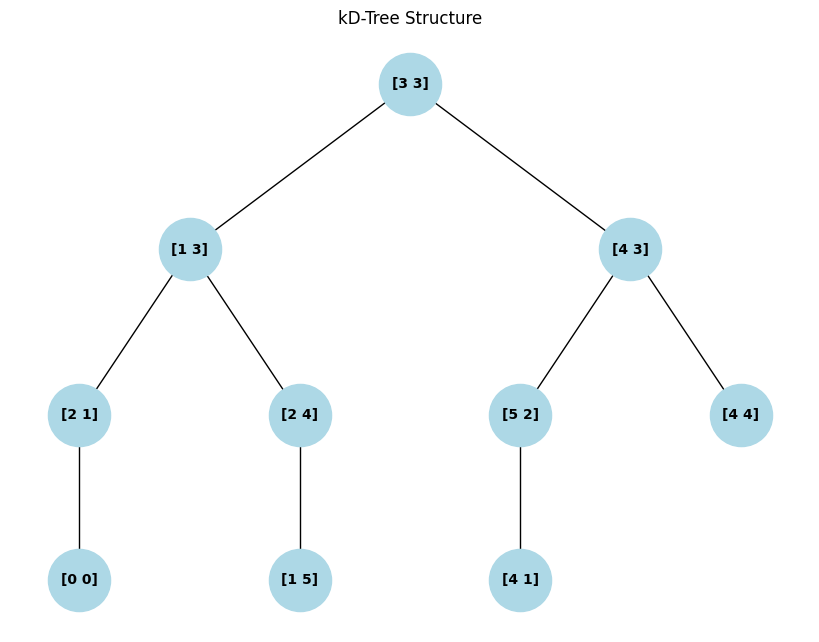

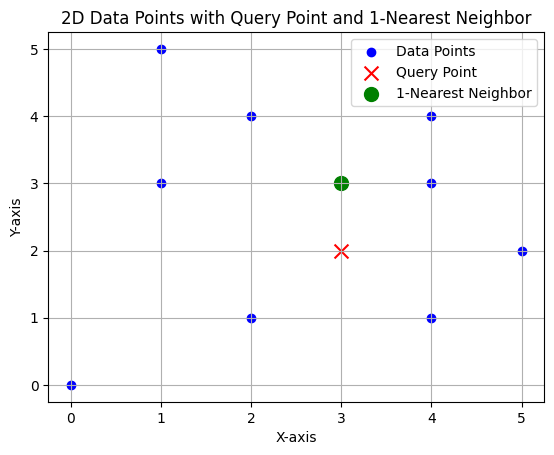

In [68]:

# Creating the dataset (10 points)
data = np.array([
    [0, 0], [1, 3], [1, 5], [2, 1],
    [2, 4], [3, 3], [4, 1], [4, 3],
    [4, 4], [5, 2]
])

# Build the KD-Tree with the given data
tree = KDTree(data)

# Define the new query point
query_point = np.array([3, 2])

# Find the nearest neighbor
nearest_neighbor = tree.find_nearest(query_point)

# Output the result
print("Input data points:")
print(data)
print(f"The nearest neighbor to {query_point} is {nearest_neighbor}")

# Visualize the tree structure
visualize_kdtree(tree)

# Plotting the points
plt.scatter(data[:, 0], data[:, 1], label="Data Points", color='blue')
plt.scatter(query_point[0], query_point[1], label="Query Point", color='red', marker='x', s=100)
plt.scatter(nearest_neighbor[0], nearest_neighbor[1], label="1-Nearest Neighbor", color='green', marker='o', s=100)

# Highlight the query point and its 1-nearest neighbor
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Data Points with Query Point and 1-Nearest Neighbor")
plt.grid(True)
plt.show()


# **Task-2 Constructing a simple data set**



---



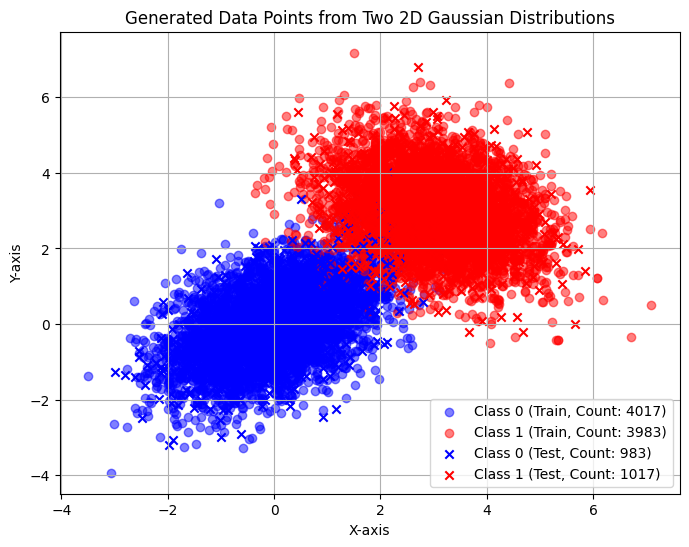

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generating 5000 points from two 2D Gaussian distributions

# Mean and covariance for the first distribution
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]  # Diagonal covariance matrix

# Mean and covariance for the second distribution
mean2 = [3, 3]
cov2 = [[1, -0.3], [-0.3, 1]]

np.random.seed(4)
# Generating 5000 points for each distribution
data1 = np.random.multivariate_normal(mean1, cov1, 5000)
data2 = np.random.multivariate_normal(mean2, cov2, 5000)

# Step 2: Combining the data and creating the labels
X = np.vstack((data1, data2))  # Combine both datasets (10000, 2)
y = np.hstack((np.zeros(5000), np.ones(5000)))  # Labels: 0 for data1, 1 for data2

# Step 3: Splitting into train and test sets (80% training, 20% testing)

# Shuffling the data
indices = np.random.permutation(len(X))

# Using 80% for training and 20% for testing
split_point = int(0.8 * len(X))
train_indices = indices[:split_point]
test_indices = indices[split_point:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# Step 4: Visualizing the generated data points with counts

# Calculating the counts
count_class_0_train = np.sum(y_train == 0)
count_class_1_train = np.sum(y_train == 1)
count_class_0_test = np.sum(y_test == 0)
count_class_1_test = np.sum(y_test == 1)

# Plotting the points
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label=f'Class 0 (Train, Count: {count_class_0_train})', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label=f'Class 1 (Train, Count: {count_class_1_train})', alpha=0.5)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label=f'Class 0 (Test, Count: {count_class_0_test})', marker='x')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label=f'Class 1 (Test, Count: {count_class_1_test})', marker='x')

plt.title("Generated Data Points from Two 2D Gaussian Distributions")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# **Task-3 Linear classifier**
---

Linear classifier accuracy: 98.30%


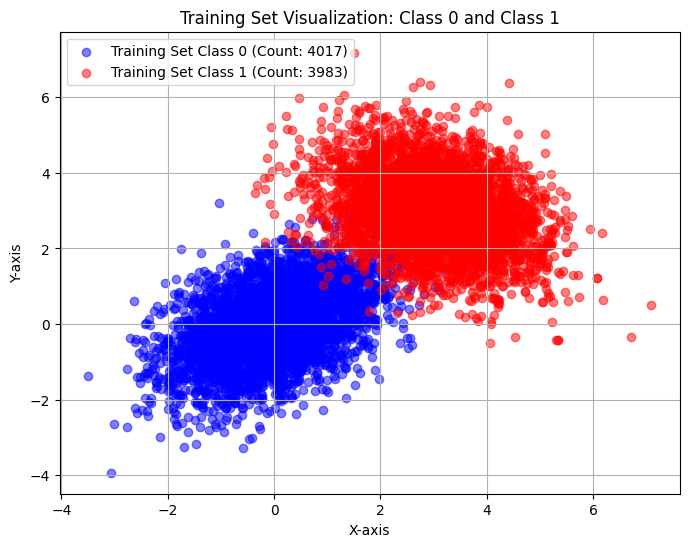

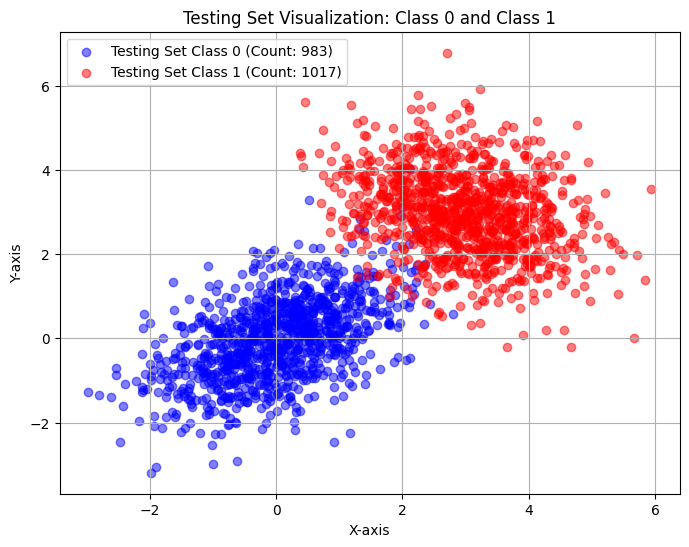

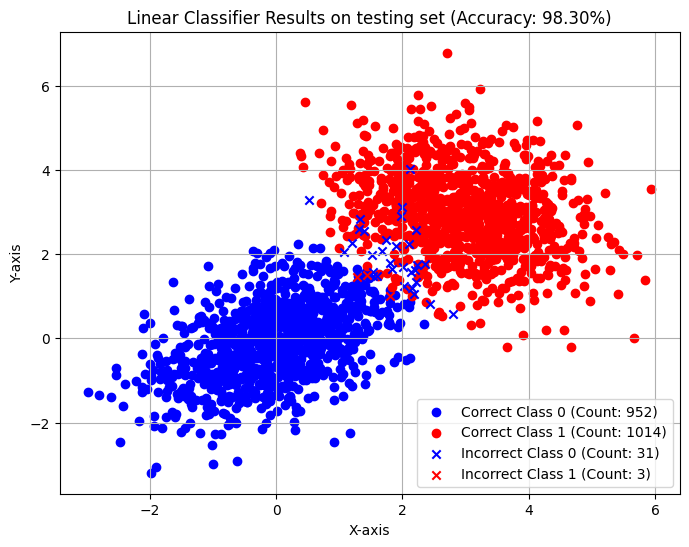

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Computing the  beta (linear classifier coefficients)
# I am adding a column of ones to X_train and X_test to account for the intercept (bias term)
X_train_with_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_with_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Computing the beta coefficients using the least squares formula
beta = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

# Step 2: Making predictions on the test set
y_pred = X_test_with_bias @ beta  # Predicting the continuous values
y_pred_class = (y_pred >= 0.5).astype(int)  # Convert to 0 or 1 using threshold

# Step 3: Calculating the classification accuracy
accuracy = np.mean(y_pred_class == y_test)
print(f"Linear classifier accuracy: {accuracy * 100:.2f}%")

# ---------------------------------------
# Plot 1: Visualizing the training set (Class 0 and Class 1) with counts

# Calculating the counts for training set
count_class_0_train = np.sum(y_train == 0)
count_class_1_train = np.sum(y_train == 1)

plt.figure(figsize=(8, 6))

# Training set points from Class 0
plt.scatter(X_train[y_train == 0][:, 0],
            X_train[y_train == 0][:, 1],
            color='blue', label=f'Training Set Class 0 (Count: {count_class_0_train})', marker='o', alpha=0.5)

# Training set points from Class 1
plt.scatter(X_train[y_train == 1][:, 0],
            X_train[y_train == 1][:, 1],
            color='red', label=f'Training Set Class 1 (Count: {count_class_1_train})', marker='o', alpha=0.5)

plt.title("Training Set Visualization: Class 0 and Class 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# ---------------------------------------
# Plot 2: Visualizing the testing set (Class 0 and Class 1) with counts

# Calculating the counts for testing set
count_class_0_test = np.sum(y_test == 0)
count_class_1_test = np.sum(y_test == 1)

plt.figure(figsize=(8, 6))

# Testing set points from Class 0
plt.scatter(X_test[y_test == 0][:, 0],
            X_test[y_test == 0][:, 1],
            color='blue', label=f'Testing Set Class 0 (Count: {count_class_0_test})', marker='o', alpha=0.5)

# Testing set points from Class 1
plt.scatter(X_test[y_test == 1][:, 0],
            X_test[y_test == 1][:, 1],
            color='red', label=f'Testing Set Class 1 (Count: {count_class_1_test})', marker='o', alpha=0.5)

plt.title("Testing Set Visualization: Class 0 and Class 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# ---------------------------------------
# Plot 3: Visualizing the classification results for the test set with counts

# Calculating counts for the test set classifications
count_correct_class_0 = np.sum((y_pred_class == y_test) & (y_test == 0))
count_correct_class_1 = np.sum((y_pred_class == y_test) & (y_test == 1))
count_incorrect_class_0 = np.sum((y_pred_class != y_test) & (y_test == 0))
count_incorrect_class_1 = np.sum((y_pred_class != y_test) & (y_test == 1))

plt.figure(figsize=(8, 6))

# Correctly classified points for class 0
plt.scatter(X_test[(y_pred_class == y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_class == y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Correct Class 0 (Count: {count_correct_class_0})', marker='o')

# Correctly classified points for class 1
plt.scatter(X_test[(y_pred_class == y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_class == y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Correct Class 1 (Count: {count_correct_class_1})', marker='o')

# Incorrectly classified points for class 0
plt.scatter(X_test[(y_pred_class != y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_class != y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Incorrect Class 0 (Count: {count_incorrect_class_0})', marker='x')

# Incorrectly classified points for class 1
plt.scatter(X_test[(y_pred_class != y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_class != y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Incorrect Class 1 (Count: {count_incorrect_class_1})', marker='x')

# Final plot adjustments
plt.title(f"Linear Classifier Results on testing set (Accuracy: {accuracy * 100:.2f}%)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()



**Incorrect Class 0:**
These are test points that actually belong to Class 0 (i.e., their true label in y_test is 0), but the classifier incorrectly predicted them as Class 1.

**Incorrect Class 1:**
These are test points that actually belong to Class 1 (i.e., their true label in y_test is 1), but the classifier incorrectly predicted them as Class 0.

# **Task-4  Nearest neighbors classification**
---

##   Nearest neighbors classification with built-in kDTree imported from scipy.spatial
---

Nearest Neighbors classifier accuracy: 96.85%


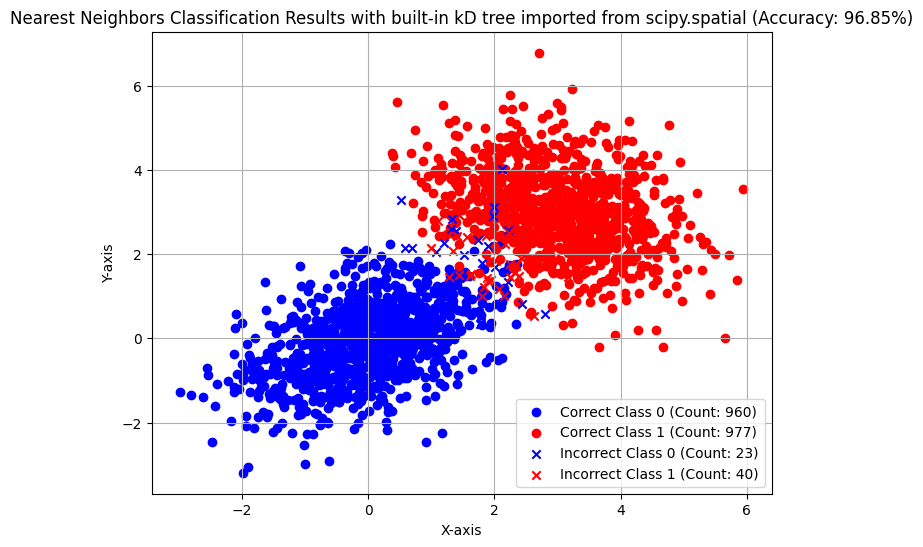

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree as KDTree_scipy

# Step 1: Building the kD-Tree using the training set
kdtree = KDTree_scipy(X_train)

# Step 2: Classifying each element in the test set based on the nearest neighbor
y_pred_nn = np.zeros(len(X_test))  # Array to store the predicted labels

for i, test_point in enumerate(X_test):
    dist, idx = kdtree.query(test_point)  # Find the nearest neighbor
    y_pred_nn[i] = y_train[idx]  # Assign the label of the nearest training example

# Step 3: Calculating the classification accuracy
accuracy_nn = np.mean(y_pred_nn == y_test)
print(f"Nearest Neighbors classifier accuracy: {accuracy_nn * 100:.2f}%")

# Step 4: Visualizing the results

# Calculating the counts for the test set classifications
count_correct_class_0_nn = np.sum((y_pred_nn == y_test) & (y_test == 0))
count_correct_class_1_nn = np.sum((y_pred_nn == y_test) & (y_test == 1))
count_incorrect_class_0_nn = np.sum((y_pred_nn != y_test) & (y_test == 0))
count_incorrect_class_1_nn = np.sum((y_pred_nn != y_test) & (y_test == 1))

plt.figure(figsize=(8, 6))

# Correctly classified points for class 0
plt.scatter(X_test[(y_pred_nn == y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_nn == y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Correct Class 0 (Count: {count_correct_class_0_nn})', marker='o')

# Correctly classified points for class 1
plt.scatter(X_test[(y_pred_nn == y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_nn == y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Correct Class 1 (Count: {count_correct_class_1_nn})', marker='o')

# Incorrectly classified points for class 0
plt.scatter(X_test[(y_pred_nn != y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_nn != y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Incorrect Class 0 (Count: {count_incorrect_class_0_nn})', marker='x')

# Incorrectly classified points for class 1
plt.scatter(X_test[(y_pred_nn != y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_nn != y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Incorrect Class 1 (Count: {count_incorrect_class_1_nn})', marker='x')

# Final plot adjustments
plt.title(f"Nearest Neighbors Classification Results with built-in kD tree imported from scipy.spatial (Accuracy: {accuracy_nn * 100:.2f}%)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()


##   Nearest neighbors classification with my implented kDTree
---

Nearest Neighbors classifier accuracy: 96.85%


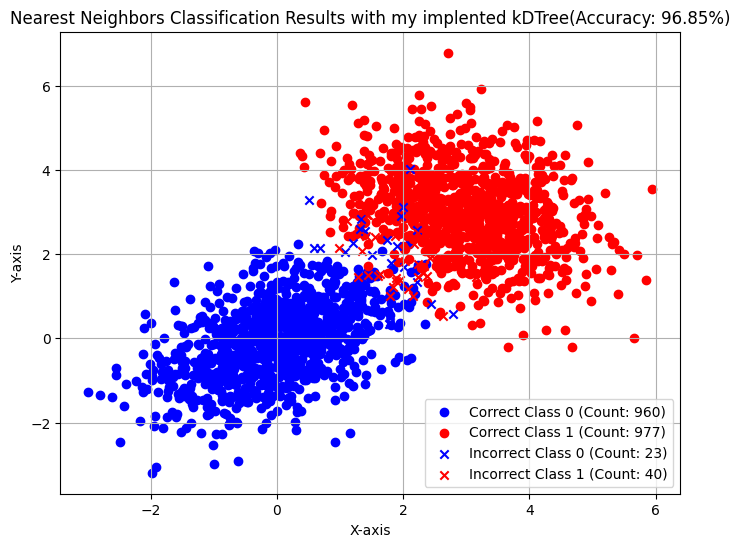

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Building the kD-Tree using the training set
kd_tree = KDTree(X_train)

# Step 2: Classifying each element in the test set based on the nearest neighbor
y_pred_nn = np.zeros(len(X_test))  # Array to store the predicted labels

for i, test_point in enumerate(X_test):
    nearest_neighbor = kd_tree.find_nearest(test_point)  # Find the nearest neighbor
    y_pred_nn[i] = y_train[np.where(np.all(X_train == nearest_neighbor, axis=1))[0][0]]  # Assign the label of the nearest neighbor

# Step 3: Calculating the classification accuracy
accuracy_nn = np.mean(y_pred_nn == y_test)
print(f"Nearest Neighbors classifier accuracy: {accuracy_nn * 100:.2f}%")

# Step 4: Visualizing the results

# Calculating the counts for the test set classifications
count_correct_class_0_nn = np.sum((y_pred_nn == y_test) & (y_test == 0))
count_correct_class_1_nn = np.sum((y_pred_nn == y_test) & (y_test == 1))
count_incorrect_class_0_nn = np.sum((y_pred_nn != y_test) & (y_test == 0))
count_incorrect_class_1_nn = np.sum((y_pred_nn != y_test) & (y_test == 1))

plt.figure(figsize=(8, 6))

# Correctly classified points for class 0
plt.scatter(X_test[(y_pred_nn == y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_nn == y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Correct Class 0 (Count: {count_correct_class_0_nn})', marker='o')

# Correctly classified points for class 1
plt.scatter(X_test[(y_pred_nn == y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_nn == y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Correct Class 1 (Count: {count_correct_class_1_nn})', marker='o')

# Incorrectly classified points for class 0
plt.scatter(X_test[(y_pred_nn != y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_nn != y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Incorrect Class 0 (Count: {count_incorrect_class_0_nn})', marker='x')

# Incorrectly classified points for class 1
plt.scatter(X_test[(y_pred_nn != y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_nn != y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Incorrect Class 1 (Count: {count_incorrect_class_1_nn})', marker='x')

# Final plot adjustments
plt.title(f"Nearest Neighbors Classification Results with my implented kDTree(Accuracy: {accuracy_nn * 100:.2f}%)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()


**Incorrect Class 0:**
These are test points that actually belong to Class 0 (i.e., their true label in y_test is 0), but the classifier incorrectly predicted them as Class 1.

In other words, the nearest neighbor found for these points was from Class 1, leading to an incorrect classification.


**Incorrect Class 1:**
These are test points that actually belong to Class 1 (i.e., their true label in y_test is 1), but the classifier incorrectly predicted them as Class 0.

In other words, the nearest neighbor found for these points was from Class 0, leading to an incorrect classification.

# **Task-5  Increasing Complexity**
---

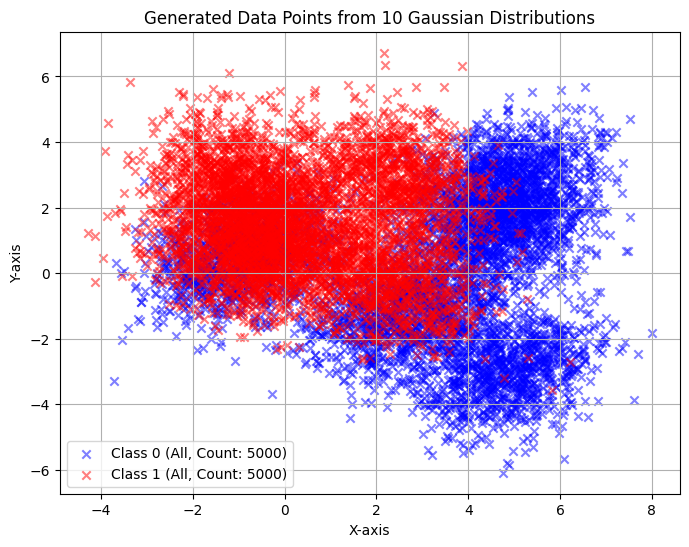

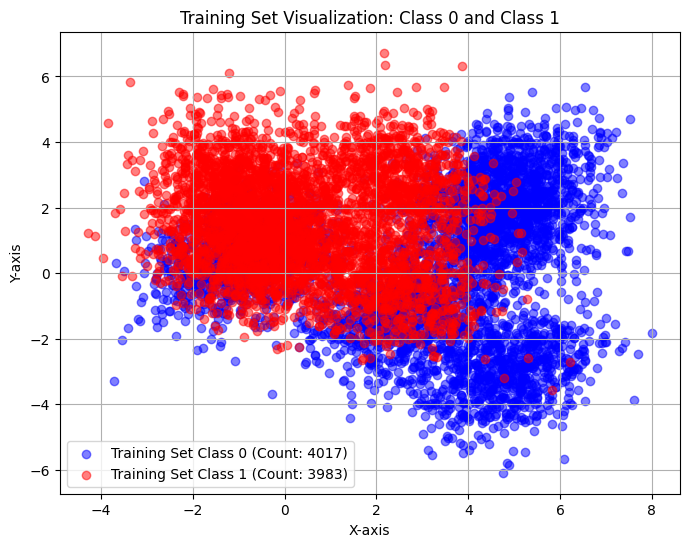

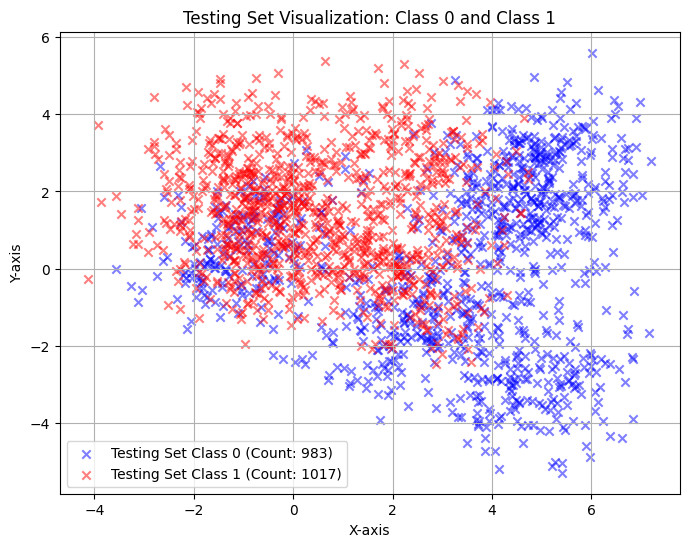

Linear classifier accuracy: 78.45%
Nearest Neighbors classifier accuracy: 76.15%


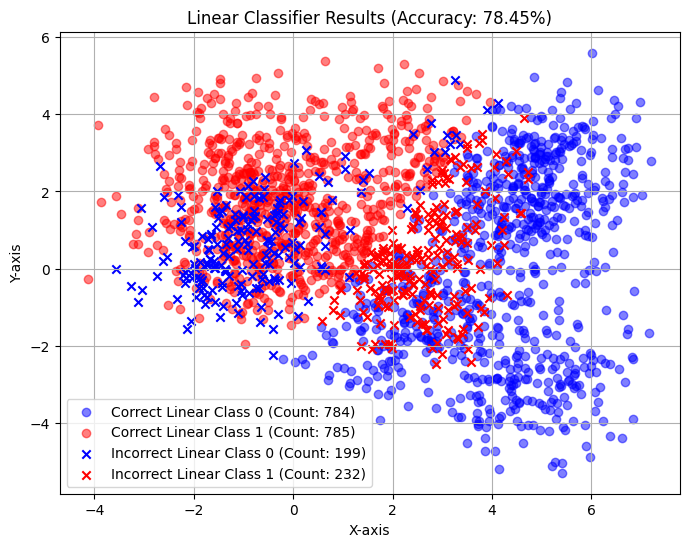

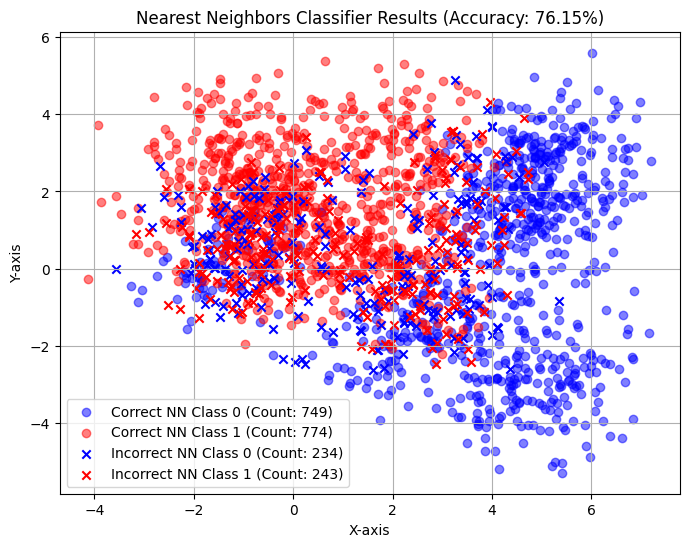

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generating 1000 samples from 10 different overlapping Gaussian distributions

# Randomly generating the means for five Gaussian distributions for Class 0 (scattered across the plane)
np.random.seed(4)  # For reproducibility
means_class_0 = np.random.uniform(low=[-3, -3], high=[5, 5], size=(5, 2))

# Covariances for Class 0 (some variability to scatter points)
covs_class_0 = [np.array([[1, 0.3], [0.3, 1]]) for _ in range(5)]

# Randomly generating the means for five Gaussian distributions for Class 1 (scattered across the plane)
means_class_1 = np.random.uniform(low=[-1, -1], high=[3, 3], size=(5, 2))

# Covariances for Class 1 (some variability to scatter points)
covs_class_1 = [np.array([[1, -0.3], [-0.3, 1]]) for _ in range(5)]

# Generating 1000 samples from each Gaussian distribution for Class 0
data_class_0 = np.vstack([np.random.multivariate_normal(mean, cov, 1000)
                          for mean, cov in zip(means_class_0, covs_class_0)])

# Generating 1000 samples from each Gaussian distribution for Class 1
data_class_1 = np.vstack([np.random.multivariate_normal(mean, cov, 1000)
                          for mean, cov in zip(means_class_1, covs_class_1)])

# Step 2: Combining the data and creating the labels
X = np.vstack((data_class_0, data_class_1))  # Combine both datasets (10000, 2)
y = np.hstack((np.zeros(len(data_class_0)), np.ones(len(data_class_1))))  # Labels: 0 for Class 0, 1 for Class 1

# Step 3: Splitting into train and test sets (80% training, 20% testing)

# Shuffling the data
indices = np.random.permutation(len(X))

# Using 80% for training and 20% for testing
split_point = int(0.8 * len(X))
train_indices = indices[:split_point]
test_indices = indices[split_point:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# ------------------------------- Plot for All Distributions -------------------------------
plt.figure(figsize=(8, 6))

# Plotting all points for Class 0
plt.scatter(data_class_0[:, 0], data_class_0[:, 1], color='blue', label=f'Class 0 (All, Count: {len(data_class_0)})', marker='x', alpha=0.5)

# Plotting all points for Class 1
plt.scatter(data_class_1[:, 0], data_class_1[:, 1], color='red', label=f'Class 1 (All, Count: {len(data_class_1)})', marker='x', alpha=0.5)

plt.title("Generated Data Points from 10 Gaussian Distributions")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# ------------------------------- Plot for Training Data -------------------------------
count_class_0_train = np.sum(y_train == 0)
count_class_1_train = np.sum(y_train == 1)

plt.figure(figsize=(8, 6))

# Training set points from Class 0
plt.scatter(X_train[y_train == 0][:, 0],
            X_train[y_train == 0][:, 1],
            color='blue', label=f'Training Set Class 0 (Count: {count_class_0_train})', marker='o', alpha=0.5)

# Training set points from Class 1
plt.scatter(X_train[y_train == 1][:, 0],
            X_train[y_train == 1][:, 1],
            color='red', label=f'Training Set Class 1 (Count: {count_class_1_train})', marker='o', alpha=0.5)

plt.title("Training Set Visualization: Class 0 and Class 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# ------------------------------- Plot for Testing Data -------------------------------
count_class_0_test = np.sum(y_test == 0)
count_class_1_test = np.sum(y_test == 1)

plt.figure(figsize=(8, 6))

# Testing set points from Class 0
plt.scatter(X_test[y_test == 0][:, 0],
            X_test[y_test == 0][:, 1],
            color='blue', label=f'Testing Set Class 0 (Count: {count_class_0_test})', marker='x', alpha=0.5)

# Testing set points from Class 1
plt.scatter(X_test[y_test == 1][:, 0],
            X_test[y_test == 1][:, 1],
            color='red', label=f'Testing Set Class 1 (Count: {count_class_1_test})', marker='x', alpha=0.5)

plt.title("Testing Set Visualization: Class 0 and Class 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Step 4: Performing the  Linear Classification (using the same process from Task 3)
X_train_with_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_with_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Computing the beta coefficients using the least squares formula
beta = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

# Predicting for the test set
y_pred_linear = X_test_with_bias @ beta
y_pred_class_linear = (y_pred_linear >= 0.5).astype(int)

# Calculating the Linear Classifier accuracy
accuracy_linear = np.mean(y_pred_class_linear == y_test)
print(f"Linear classifier accuracy: {accuracy_linear * 100:.2f}%")

# Step 5: Performing the Nearest Neighbor Classification (using kD-Tree from Task 4)

kd_tree = KDTree(X_train)

# Classifying each element in the test set based on the nearest neighbor
y_pred_nn = np.zeros(len(X_test))  # Array to store the predicted labels

for i, test_point in enumerate(X_test):
    nearest_neighbor = kd_tree.find_nearest(test_point)  # Find the nearest neighbor
    y_pred_nn[i] = y_train[np.where(np.all(X_train == nearest_neighbor, axis=1))[0][0]]  # Assign the label of the nearest neighbor

# Calculating the Nearest Neighbor classifier accuracy
accuracy_nn = np.mean(y_pred_nn == y_test)
print(f"Nearest Neighbors classifier accuracy: {accuracy_nn * 100:.2f}%")

# Step 6: Visualizing the Results

# Linear Classifier Visualization with counts
correct_class_0_linear = np.sum((y_pred_class_linear == y_test) & (y_test == 0))
correct_class_1_linear = np.sum((y_pred_class_linear == y_test) & (y_test == 1))
incorrect_class_0_linear = np.sum((y_pred_class_linear != y_test) & (y_test == 0))
incorrect_class_1_linear = np.sum((y_pred_class_linear != y_test) & (y_test == 1))

plt.figure(figsize=(8, 6))

# Correctly classified points for linear classifier
plt.scatter(X_test[(y_pred_class_linear == y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_class_linear == y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Correct Linear Class 0 (Count: {correct_class_0_linear})', marker='o', alpha=0.5)
plt.scatter(X_test[(y_pred_class_linear == y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_class_linear == y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Correct Linear Class 1 (Count: {correct_class_1_linear})', marker='o', alpha=0.5)

# Incorrectly classified points for linear classifier
plt.scatter(X_test[(y_pred_class_linear != y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_class_linear != y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Incorrect Linear Class 0 (Count: {incorrect_class_0_linear})', marker='x')
plt.scatter(X_test[(y_pred_class_linear != y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_class_linear != y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Incorrect Linear Class 1 (Count: {incorrect_class_1_linear})', marker='x')

plt.title(f"Linear Classifier Results (Accuracy: {accuracy_linear * 100:.2f}%)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()



# Nearest Neighbor Classifier Visualization with counts
correct_class_0_nn = np.sum((y_pred_nn == y_test) & (y_test == 0))
correct_class_1_nn = np.sum((y_pred_nn == y_test) & (y_test == 1))
incorrect_class_0_nn = np.sum((y_pred_nn != y_test) & (y_test == 0))
incorrect_class_1_nn = np.sum((y_pred_nn != y_test) & (y_test == 1))

plt.figure(figsize=(8, 6))

# Correctly classified points for nearest neighbor classifier
plt.scatter(X_test[(y_pred_nn == y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_nn == y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Correct NN Class 0 (Count: {correct_class_0_nn})', marker='o', alpha=0.5)
plt.scatter(X_test[(y_pred_nn == y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_nn == y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Correct NN Class 1 (Count: {correct_class_1_nn})', marker='o', alpha=0.5)

# Incorrectly classified points for nearest neighbor classifier
plt.scatter(X_test[(y_pred_nn != y_test) & (y_test == 0)][:, 0],
            X_test[(y_pred_nn != y_test) & (y_test == 0)][:, 1],
            color='blue', label=f'Incorrect NN Class 0 (Count: {incorrect_class_0_nn})', marker='x')
plt.scatter(X_test[(y_pred_nn != y_test) & (y_test == 1)][:, 0],
            X_test[(y_pred_nn != y_test) & (y_test == 1)][:, 1],
            color='red', label=f'Incorrect NN Class 1 (Count: {incorrect_class_1_nn})', marker='x')

plt.title(f"Nearest Neighbors Classifier Results (Accuracy: {accuracy_nn * 100:.2f}%)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best")
plt.grid(True)
plt.show()
